In [2]:
import numpy as np
import pandas as pd
import seaborn
import json
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

path_to_folder = "./Project_Logs/"

In [3]:
subjects = glob.glob(path_to_folder + "*/")

In [4]:
controller_fps = []
controller_tps = []
hand_fps = []
hand_tps = []

for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    for file in files:
        print(file)
        if "Controller_FPS" in file:
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            controller_fps.append(df)
        elif "Controller_TPS" in file:
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            controller_tps.append(df)
        elif "MotionCapture_FPS" in file:
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            hand_fps.append(df)
        elif "MotionCapture_TPS" in file:
            with open(file) as f:
                temp = []
                for line in f:
                    temp.append(json.loads(line))
            df = pd.io.json.json_normalize(temp[0]['allLogs'])
            df.columns = df.columns.map(lambda x: x.split("*.")[-1])
            hand_tps.append(df)

./Project_Logs\Antoine\
./Project_Logs\Antoine\Controller_FPS.json
./Project_Logs\Antoine\Controller_TPS.json
./Project_Logs\Antoine\MotionCapture_FPS.json
./Project_Logs\Antoine\MotionCapture_TPS.json
./Project_Logs\Thomas\
./Project_Logs\Thomas\Controller_FPS.json
./Project_Logs\Thomas\Controller_TPS.json
./Project_Logs\Thomas\MotionCapture_FPS.json
./Project_Logs\Thomas\MotionCapture_TPS.json
./Project_Logs\Yann\
./Project_Logs\Yann\Controller_FPS.json
./Project_Logs\Yann\Controller_TPS.json
./Project_Logs\Yann\MotionCapture_FPS.json
./Project_Logs\Yann\MotionCapture_TPS.json


<IPython.core.display.Javascript object>


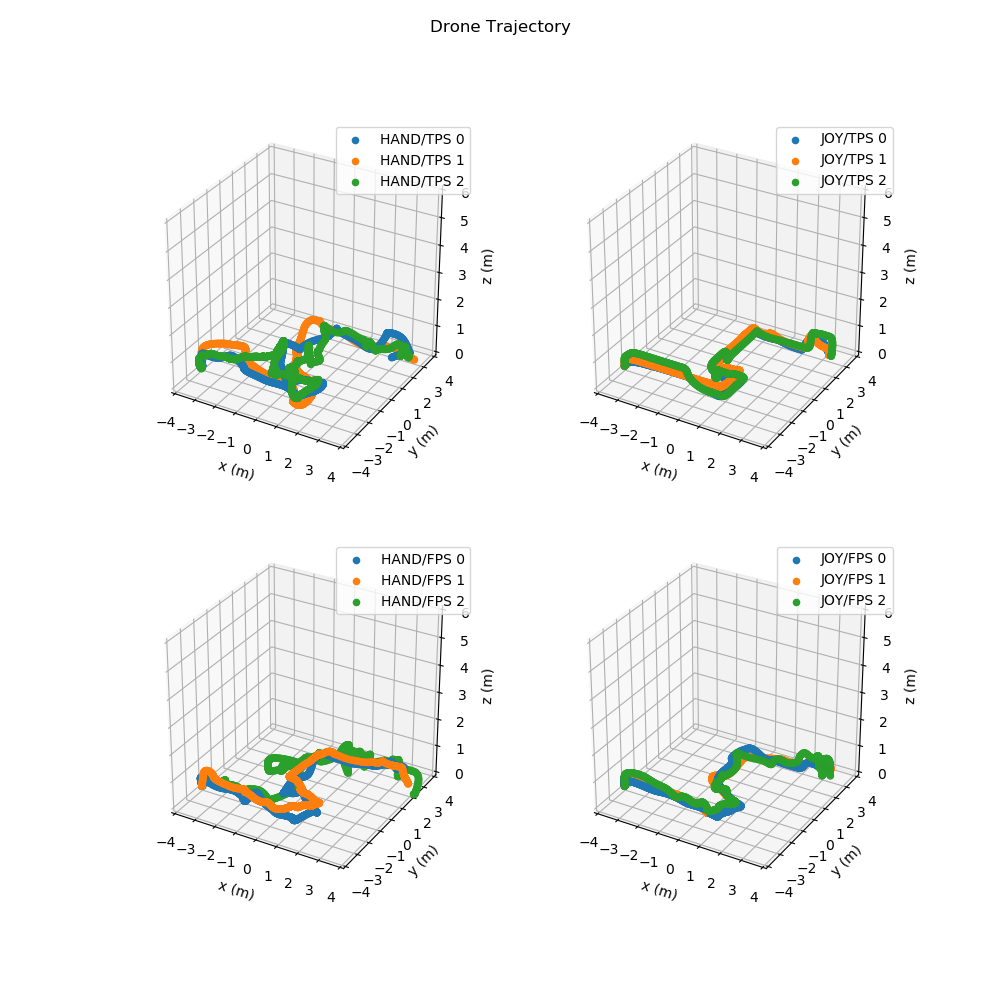

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
for i in range(len(hand_tps)):
    ax.scatter(hand_tps[i]['dronePosition.x'],hand_tps[i]['dronePosition.z'],hand_tps[i]['dronePosition.y'], label='HAND/TPS '+str(i))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(0,6)
plt.legend()
plt.show()

ax = fig.add_subplot(222, projection='3d')
for i in range(len(controller_tps)):
    ax.scatter(controller_tps[i]['dronePosition.x'],controller_tps[i]['dronePosition.z'],controller_tps[i]['dronePosition.y'], label='JOY/TPS '+str(i))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(0,6)
plt.legend()
plt.show()

ax = fig.add_subplot(223, projection='3d')
for i in range(len(hand_fps)):
    ax.scatter(hand_fps[i]['dronePosition.x'],hand_fps[i]['dronePosition.z'],hand_fps[i]['dronePosition.y'], label='HAND/FPS '+str(i))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(0,6)
plt.legend()
plt.show()

ax = fig.add_subplot(224, projection='3d')
for i in range(len(controller_fps)):
    ax.scatter(controller_fps[i]['dronePosition.x'],controller_fps[i]['dronePosition.z'],controller_fps[i]['dronePosition.y'], label='JOY/FPS '+str(i))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(0,6)
plt.legend()
plt.show()

fig.suptitle('Drone Trajectory')
plt.show()



<IPython.core.display.Javascript object>


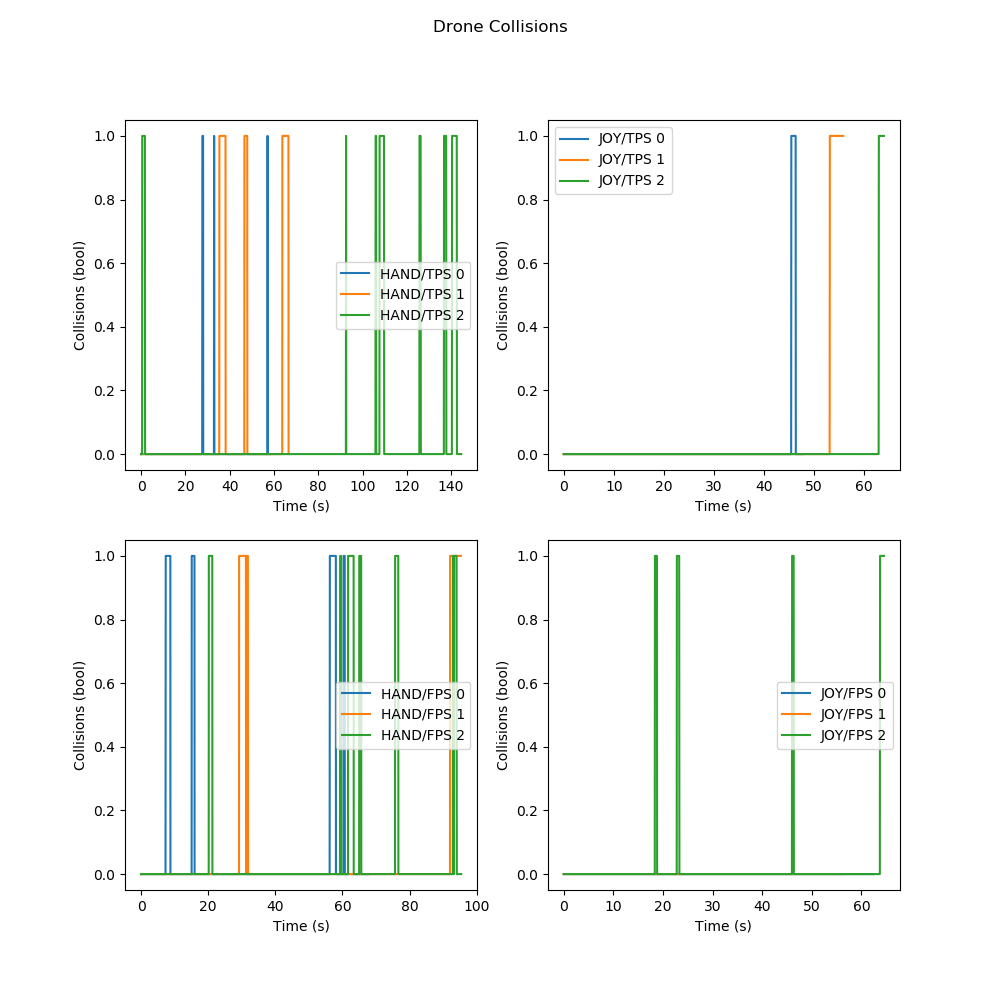

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221)
for i in range(len(hand_tps)):
    ax.plot(hand_tps[i]['absoluteTime'],hand_tps[i]['collision'], label='HAND/TPS '+str(i))
plt.xlabel('Time (s)')
plt.ylabel('Collisions (bool)')
plt.legend()
plt.show()

ax = fig.add_subplot(222)
for i in range(len(controller_tps)):
    ax.plot(controller_tps[i]['absoluteTime'],controller_tps[i]['collision'], label='JOY/TPS '+str(i))
plt.xlabel('Time (s)')
plt.ylabel('Collisions (bool)')
plt.legend()
plt.show()

ax = fig.add_subplot(223)
for i in range(len(hand_fps)):
    ax.plot(hand_fps[i]['absoluteTime'],hand_fps[i]['collision'], label='HAND/FPS '+str(i))
plt.xlabel('Time (s)')
plt.ylabel('Collisions (bool)')
plt.legend()
plt.show()

ax = fig.add_subplot(224)
for i in range(len(controller_fps)):
    ax.plot(controller_fps[i]['absoluteTime'],controller_fps[i]['collision'], label='JOY/FPS '+str(i))
plt.xlabel('Time (s)')
plt.ylabel('Collisions (bool)')
plt.legend()
plt.show()

fig.suptitle('Drone Collisions')
plt.show()

